# TC 3007B
## Word Embeddings


## Equipo: Foraneos y un Emi

### Carolina Arratia Camacho - A01367552

### Emiliano Mendoza Nieto - A01706083

### Frida Lizett Zavala Pérez - A01275226

### Fabián González Vera - A01367585

### Jazzareth Bernal Martínez- A01367882



<br>

#### Activity 1: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (10%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    - Functionality (90%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (15% each for a total of 30%)
       - Similarity function (30%)
       - Analogy function (30%)
|



#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

In [2]:
# Access to Drive where are files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load file

In [3]:
# Load the path for load files
# PATH = '/content/drive/MyDrive/9° S(AgoDic2023)/IA_2/M3_LenguajeNatural_Cantoral/ENTREGAS/glove.6B.200d.txt'
PATH = '/content/drive/MyDrive/9° S(AgoDic2023)/IA_2/M3_LenguajeNatural_Cantoral/ENTREGAS/glove.6B.50d.txt'
emb_dim = 50

In [4]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    embeddings_dict = {}

    with open(path, 'r', encoding='utf-8') as f:

        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array([float(val) for val in values[1:]])
            embeddings_dict[word] = vector
    return embeddings_dict



In [5]:
# Create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [6]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [7]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [8]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [9]:
# Function of plot the embeddings with PCA
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA):
    word_vectors = [embeddings_dict[word] for word in words2show if word in embeddings_dict]

    if func == PCA:
        reducer = PCA(n_components=2)
    elif func == TSNE:
        reducer = TSNE(n_components=2)

    # Convert word_vectors to a 2D NumPy array
    word_vectors = np.array(word_vectors)

    reduced_embeddings = reducer.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words2show):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y)
        plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.title(f'Word Embeddings Visualization ({func.__name__})')
    plt.show()



In [10]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


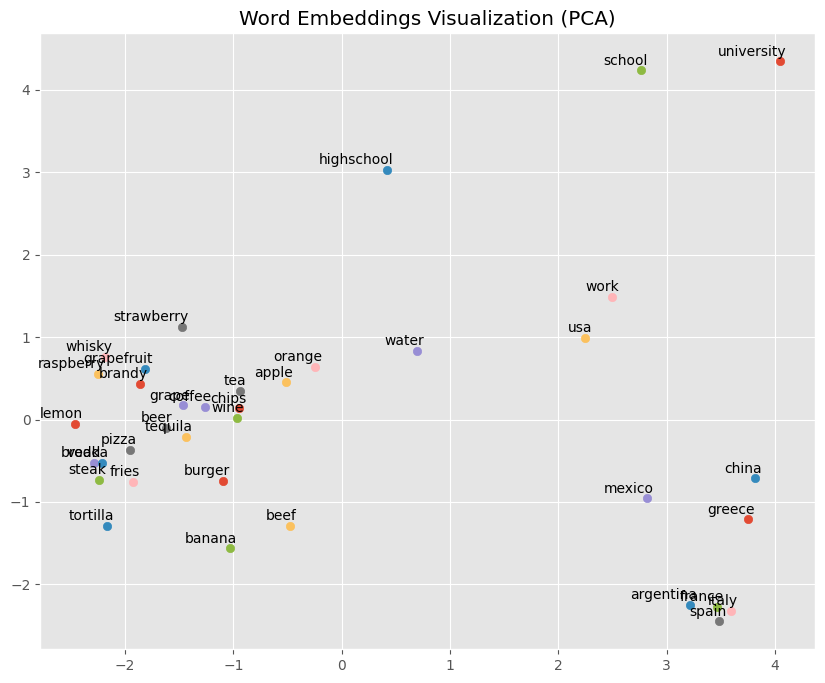

In [11]:
# Run Function of plot
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

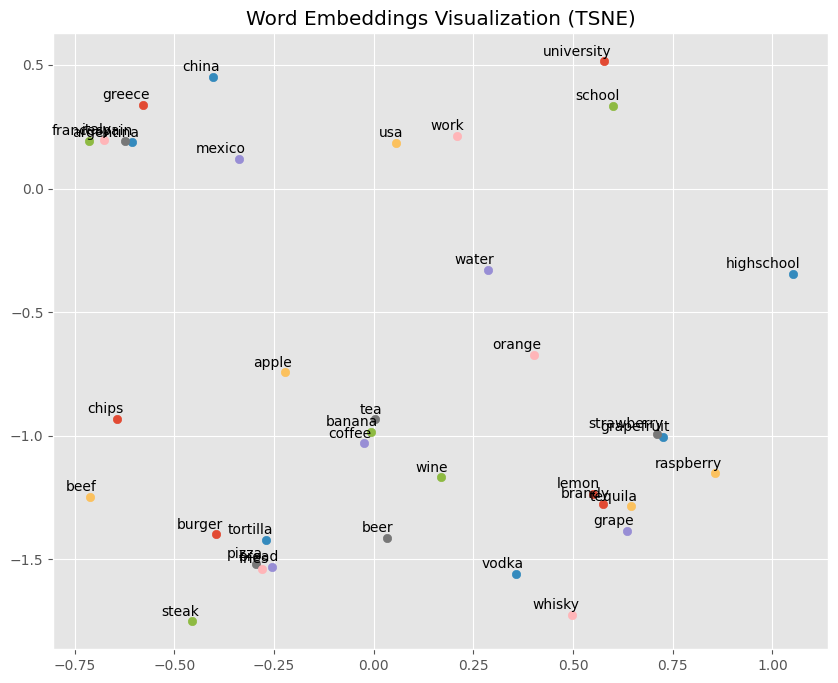

In [12]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, func=TSNE)


### Let us compute analogies

In [13]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    if word1 in embeddings_dict and word2 in embeddings_dict and word3 in embeddings_dict:
        # Calculate the analogy
        word1_vec = embeddings_dict[word1]
        word2_vec = embeddings_dict[word2]
        word3_vec = embeddings_dict[word3]

        # Perform the vector arithmetic
        analogy_vector = word2_vec - word1_vec + word3_vec

        # Find the word that is closest to the analogy_vector
        closest_word = None
        min_distance = float("inf")

        for word, embedding in embeddings_dict.items():
            if word not in [word1, word2, word3]:
                distance = np.linalg.norm(embedding - analogy_vector)
                if distance < min_distance:
                    min_distance = distance
                    closest_word = word

        return closest_word
    else:
        return "One or more words not found in embeddings."



In [14]:
print(embeddings_dict)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    if word in embeddings_dict:
        word_vector = embeddings_dict[word]
        similarities = {}
        for other_word, other_vector in embeddings_dict.items():
            if other_word != word:
                cosine_similarity = np.dot(word_vector, other_vector) / (norm(word_vector) * norm(other_vector))
                similarities[other_word] = cosine_similarity
        sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
        return sorted_similarities[:top_n]
    else:
        return "Word not found in embeddings."



In [16]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [17]:
# Similarities
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


In [20]:
print('Man is to king as woman is to :  ',analogy('man','king','woman', embeddings_dict))

Man is to king as woman is to :   queen
